In [2]:
using PyPlot, DelimitedFiles, Interpolations
RawData = (open(readdlm,"METALS_Silver_Palik.txt"))
N = size(RawData)[1]-1

Lambda = RawData[2:end,1]
n = RawData[2:end,2]
k = RawData[2:end,3]

Omega = 2*π*3e8./Lambda*1e6
Epsilon = (n+1im*k).^2

cc =10
open("Silver.txt", "w") do f
    for i=1:N
        ω = Omega[i]
        ϵr = real(Epsilon[i])
        ϵi = cc*imag(Epsilon[i])
        write(f, "$ω $ϵr+$ϵi","i\n")
    end
end
run(`rm SphericalHarmonicsOptimization/Silver.txt`)
run(`cp Silver.txt SphericalHarmonicsOptimization`)

A_x = Omega[end:-1:1]
knots = (A_x,)
Εr = real(Epsilon[end:-1:1])
Εi = cc*imag(Epsilon[end:-1:1])
itpr = interpolate(knots, Εr, Gridded(Linear()))
itpi = interpolate(knots, Εi, Gridded(Linear()))

λtest = 500e-9
k = 2*π/λtest
d = 50e-9
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:35
└ @ Core In[2]:35
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:35
└ @ Core In[2]:35


110.66702511028328

In [12]:
ϵ

-8.50884945217391 + 3.7945469391304343im

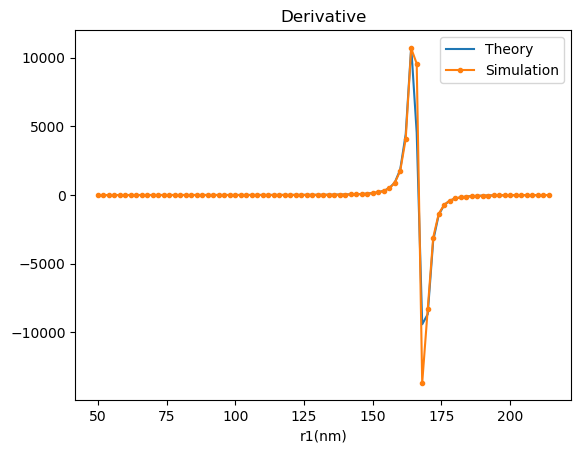

PyObject <matplotlib.legend.Legend object at 0x13aa26940>

In [4]:
dρt = zeros(N-1)
for i=1:N-1
    dρt[i] = (dρ1[i]+dρ1[i+1])/2
end
plot(r1[1:N-1],dρt,label="Theory")
plot(r1,dρs,".-",label="Simulation")
xlabel("r1(nm)")
title("Derivative")
legend()

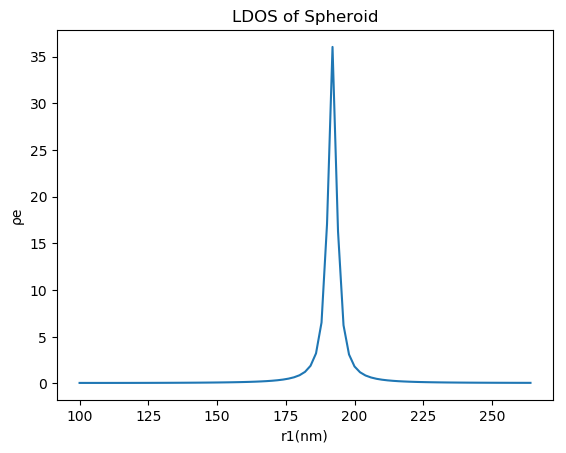

PyObject Text(24.000000000000007, 0.5, 'ρe')

In [12]:
# d_min = 100nm, λ=550
Data=[ #1 Rho_s
 #2 Dfdr1_t (Theoretical gradients using SIE) 
 #2 Dfdr2_t (Theoretical gradients using SIE) 
 #3 Dfdr_s (Simulation gradients using forward diff)
0.0615746 -0.158252 -0.0793479 -0.128714
0.0613171 -0.097594 -0.0992497 -0.0693817
0.0611784 -0.0379853 -0.120107 -0.00913364
0.0611601 0.0213739 -0.142386 0.0485512
0.0612572 0.0805929 -0.165567 0.109484
0.0614762 0.140952 -0.190605 0.170236
0.0618166 0.202342 -0.217292 0.232614
0.0622819 0.265681 -0.245838 0.294528
0.0628709 0.330923 -0.275945 0.363287
0.0635975 0.399857 -0.308743 0.436436
0.0644704 0.473047 -0.344532 0.507466
0.0654853 0.550628 -0.38279 0.587892
0.0666611 0.634012 -0.424417 0.678103
0.0680173 0.725164 -0.470494 0.777666
0.0695726 0.825309 -0.521508 0.877881
0.0713284 0.935302 -0.577013 0.987823
0.073304 1.05672 -0.638311 1.13015
0.0755643 1.19454 -0.708118 1.25289
0.0780701 1.34696 -0.783906 1.43076
0.0809316 1.52212 -0.871032 1.61909
0.0841698 1.72309 -0.969394 1.83164
0.0878331 1.95456 -1.08148 2.08954
0.0920122 2.22454 -1.21093 2.35956
0.0967313 2.5386 -1.35836 2.72656
0.102184 2.91223 -1.53243 3.12479
0.108434 3.35713 -1.73524 3.64199
0.115718 3.89805 -1.97799 4.19206
0.124102 4.54785 -2.26359 4.94201
0.133986 5.35274 -2.61141 5.83069
0.145647 6.35067 -3.03472 6.93146
0.15951 7.61006 -3.55527 8.33674
0.176184 9.2155 -4.20853 10.2394
0.196663 11.3195 -5.04416 12.638
0.221939 14.1124 -6.12743 15.8652
0.253669 17.8879 -7.56205 20.1731
0.294015 23.1005 -9.49543 26.9147
0.347845 30.722 -12.2503 35.8699
0.419584 41.9342 -16.2081 50.3021
0.520189 59.4816 -22.2418 71.8855
0.66396 87.7944 -31.7367 109.652
0.883264 137.448 -47.9273 180.933
1.24513 233.509 -78.4243 324.385
1.8939 441.437 -142.545 666.936
3.22777 976.267 -302.718 1648.26
6.52429 2689.09 -800.753 5273.97
17.0722 9189.71 -2636.81 9481.59
36.0354 -677.018 -5.61456 -9873.28
16.2889 -8770.94 2210.42 -5025.15
6.23856 -2544.3 613.855 -1566.71
3.10515 -931.949 213.819 -640.655
1.82384 -423.079 91.8882 -309.626
1.20459 -225.605 46.3355 -174.07
0.856447 -133.421 25.8579 -106.022
0.644402 -85.3874 15.6009 -71.1596
0.502083 -57.3107 9.83544 -47.9792
0.406125 -40.5242 6.54034 -34.8775
0.33637 -29.5735 4.48139 -25.5787
0.285212 -22.2735 3.16971 -19.7448
0.245723 -17.1237 2.29301 -15.0319
0.215659 -13.4891 1.70181 -12.101
0.191457 -10.7769 1.28487 -9.78503
0.171887 -8.72753 0.98644 -7.91074
0.156065 -7.16877 0.773463 -6.52372
0.143018 -5.95697 0.621673 -5.48431
0.132049 -4.99031 0.504392 -4.58162
0.122886 -4.22171 0.420869 -3.90033
0.115086 -3.59672 0.357367 -3.35453
0.108376 -3.08099 0.309921 -2.85092
0.102675 -2.65811 0.274992 -2.50359
0.0976674 -2.30094 0.247939 -2.15996
0.0933475 -2.00161 0.228576 -1.87254
0.0896024 -1.74948 0.213778 -1.62885
0.0863447 -1.53474 0.203206 -1.44762
0.0834495 -1.34849 0.196379 -1.25262
0.0809442 -1.18962 0.191002 -1.14251
0.0786592 -1.04638 0.187607 -0.984504
0.0766902 -0.924208 0.186115 -0.865824
0.0749585 -0.816681 0.185939 -0.778434
0.0734017 -0.720634 0.184788 -0.671628
0.0720584 -0.636787 0.185014 -0.597872
0.0708627 -0.561206 0.185463 -0.536077
0.0697905 -0.49201 0.185935 -0.461884
0.0688668 -0.430325 0.18725 -0.404558
]
ρs = Data[:,1];
dρ1 = Data[:,2];
dρ2 = Data[:,3];
dρs = Data[:,4];
N = length(ρs);
sr = 100
st = sr+(N-1)*2;
r1 = range(sr,stop=st,step=2);
plot(r1,ρs)
title("LDOS of Spheroid")
xlabel("r1(nm)")
ylabel("ρe")

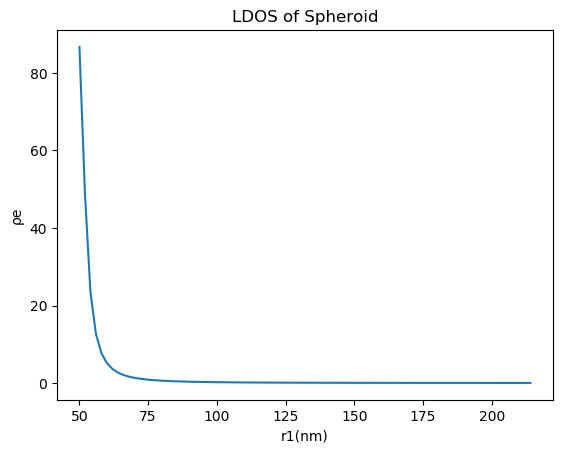

PyObject Text(24.000000000000007, 0.5, 'ρe')

In [32]:
#d_min = 203.4 λ=550 nm
Data=[ #1 Rho_s
 #2 Dfdr1_t (Theoretical gradients using SIE) 
 #2 Dfdr2_t (Theoretical gradients using SIE) 
 #3 Dfdr_s (Simulation gradients using forward diff)
86.7053 496.854 25.7394 -18891.7
48.9218 -18996.6 -13360.2 -12725.3
23.4713 -8060.43 -7241.13 -5398.33
12.6747 -3499.96 -3354.98 -2498.88
7.6769 -1713.92 -1698.52 -1281.04
5.11482 -948.774 -964.511 -735.233
3.64435 -575.694 -598.042 -469.796
2.70476 -369.912 -391.872 -305.214
2.09433 -252.53 -272.718 -215.553
1.66323 -178.816 -196.495 -151.886
1.35946 -132.013 -147.748 -115.501
1.12846 -99.6922 -113.571 -86.5425
0.955371 -77.4802 -89.8336 -70.1478
0.815076 -60.9029 -71.7901 -54.5366
0.706002 -48.9429 -58.6863 -44.146
0.617711 -39.9159 -48.6683 -35.8852
0.54594 -33.037 -40.9738 -30.3752
0.48519 -27.5639 -34.7583 -25.4106
0.434368 -23.2479 -29.7998 -21.2114
0.391946 -19.8306 -25.8458 -18.7755
0.354395 -16.9704 -22.4757 -15.517
0.323361 -14.7119 -19.8124 -14.1835
0.294994 -12.7536 -17.4411 -11.7137
0.271566 -11.1989 -15.5734 -10.53
0.250506 -9.86356 -13.936 -9.26854
0.231969 -8.73569 -12.5441 -8.27251
0.215424 -7.76778 -11.3339 -7.32589
0.200772 -6.94293 -10.2924 -6.654
0.187464 -6.22146 -9.36949 -5.80846
0.175848 -5.61107 -8.58821 -5.3512
0.165145 -5.07034 -7.88291 -4.85741
0.15543 -4.59421 -7.25632 -4.40266
0.146625 -4.17579 -6.70141 -3.94333
0.138738 -3.81201 -6.21616 -3.6722
0.131394 -3.48333 -5.77196 -3.33709
0.12472 -3.19326 -5.3749 -3.0842
0.118551 -2.93236 -5.01632 -2.8009
0.11295 -2.70093 -4.69602 -2.59615
0.107757 -2.49223 -4.40326 -2.41987
0.102918 -2.30236 -4.13524 -2.12056
0.0986764 -2.13837 -3.90516 -2.12702
0.0944224 -1.97984 -3.67461 -1.90562
0.0906111 -1.83933 -3.47258 -1.76688
0.0870774 -1.71172 -3.28789 -1.68319
0.083711 -1.59315 -3.1132 -1.50789
0.0806952 -1.48782 -2.95958 -1.45514
0.0777849 -1.38858 -2.81227 -1.35537
0.0750742 -1.29779 -2.67584 -1.22874
0.0726167 -1.21584 -2.55423 -1.21274
0.0701912 -1.13718 -2.43431 -1.09048
0.0680103 -1.0664 -2.32816 -1.01457
0.0659811 -1.00063 -2.23027 -0.978893
0.0640234 -0.938294 -2.13565 -0.898765
0.0622258 -0.880605 -2.04959 -0.855198
0.0605154 -0.828357 -1.9682 -0.78572
0.058944 -0.778649 -1.89366 -0.773621
0.0573967 -0.730262 -1.82005 -0.70949
0.0559778 -0.685082 -1.75322 -0.653416
0.0546709 -0.643441 -1.69134 -0.614824
0.0534413 -0.60363 -1.63315 -0.611873
0.0522175 -0.564955 -1.57467 -0.522456
0.0511726 -0.529738 -1.52504 -0.521217
0.0501302 -0.495117 -1.47476 -0.469043
0.0491921 -0.462272 -1.42947 -0.440264
0.0483116 -0.430063 -1.38635 -0.402287
0.047507 -0.400333 -1.34633 -0.386208
0.0467346 -0.370019 -1.30702 -0.367216
0.0460002 -0.340268 -1.26935 -0.308134
0.0453839 -0.31275 -1.23655 -0.309183
0.0447655 -0.283847 -1.20268 -0.257157
0.0442512 -0.25625 -1.17304 -0.243009
0.0437652 -0.228713 -1.14408 -0.202564
0.0433601 -0.20172 -1.1181 -0.189502
0.0429811 -0.17315 -1.09175 -0.144639
0.0426918 -0.145348 -1.06881 -0.134178
0.0424234 -0.116666 -1.04633 -0.0924646
0.0422385 -0.0866264 -1.0255 -0.0805425
0.0420774 -0.0562554 -1.00491 -0.0349912
0.0420074 -0.0256757 -0.987912 -0.00696282
0.0419935 0.00846119 -0.970415 0.0515248
0.0420966 0.0448177 -0.956357 0.0561081
0.0422088 0.0810653 -0.942564 0.115356
0.0424395 0.120856 -0.930872 0.144275
]
ρs = Data[:,1];
dρ1 = Data[:,2];
dρ2 = Data[:,3];
dρs = Data[:,4];
N = length(ρs);
sr = 203.4
st = sr+(N-1)*2;
r1 = range(sr,stop=st,step=2);
plot(r1,ρs)
title("LDOS of Spheroid")
xlabel("r1(nm)")
ylabel("ρe")


In [10]:
(1.12/sqrt(4*pi))^2

0.0998219803072368

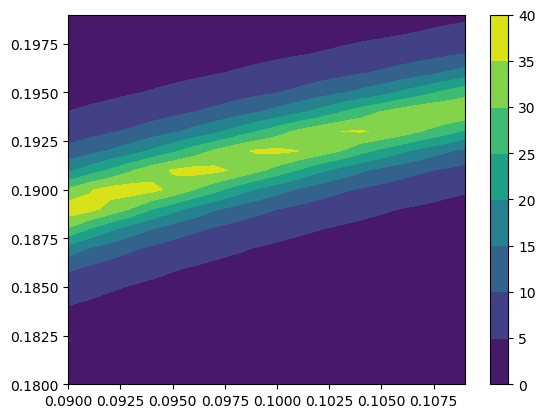

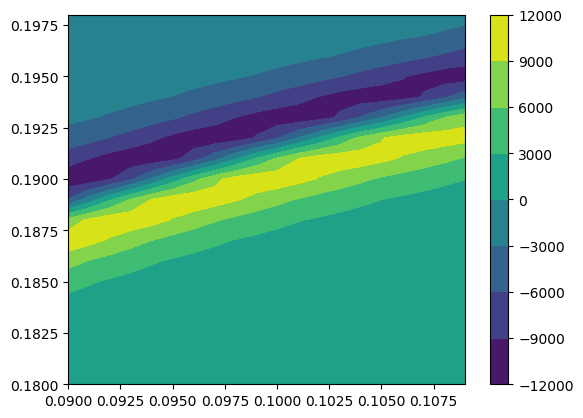

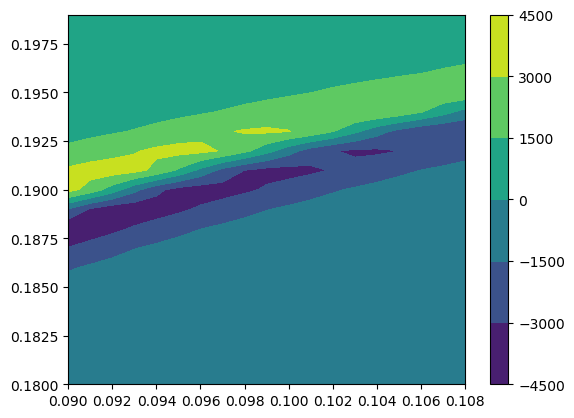

PyObject <matplotlib.colorbar.Colorbar object at 0x14508bcc0>

In [66]:
#spheroid 
 #1 r1
 #2 r2
 #3 Rho_s
 #4 Dfdr1_t (Theoretical gradients using SIE) 
 #5 Dfdr2_t (Theoretical gradients using SIE) 
data=[0.18 0.09 1.70744 351.369 -140.923
0.18 0.091 1.57276 312.7 -123.745
0.18 0.092 1.458 280.735 -109.584
0.18 0.093 1.35888 254.157 -97.8217
0.18 0.094 1.26635 229.762 -87.2349
0.18 0.095 1.18439 208.858 -78.2064
0.18 0.096 1.10939 190.272 -70.2753
0.18 0.097 1.04653 175.075 -63.7477
0.18 0.098 0.985442 160.608 -57.6721
0.18 0.099 0.929937 147.828 -52.3568
0.18 0.1 0.879937 136.502 -47.6649
0.18 0.101 0.834372 126.495 -43.5279
0.18 0.102 0.794065 117.764 -39.9447
0.18 0.103 0.756831 109.945 -36.7421
0.18 0.104 0.72034 102.316 -33.7089
0.18 0.105 0.687064 95.4726 -30.9883
0.18 0.106 0.659364 89.9906 -28.7688
0.18 0.107 0.632326 84.6398 -26.636
0.18 0.108 0.606712 79.6831 -24.6888
0.18 0.109 0.582 74.9221 -22.8632
0.181 0.09 2.12163 487.768 -191.928
0.181 0.091 1.94481 431.22 -167.362
0.181 0.092 1.79163 383.83 -146.928
0.181 0.093 1.65144 341.865 -129.133
0.181 0.094 1.53063 306.83 -114.336
0.181 0.095 1.42882 278.366 -102.246
0.181 0.096 1.33205 251.805 -91.2444
0.181 0.097 1.24035 227.403 -81.3212
0.181 0.098 1.16928 209.137 -73.7027
0.181 0.099 1.09566 190.509 -66.2313
0.181 0.1 1.03747 176.3 -60.3928
0.181 0.101 0.977785 161.855 -54.6862
0.181 0.102 0.924129 149.199 -49.7153
0.181 0.103 0.877165 138.413 -45.4611
0.181 0.104 0.838165 129.747 -41.9721
0.181 0.105 0.797258 120.684 -38.4749
0.181 0.106 0.757434 111.985 -35.1865
0.181 0.107 0.725225 105.163 -32.5414
0.181 0.108 0.695619 98.9892 -30.1688
0.181 0.109 0.665462 92.7523 -27.8313
0.182 0.09 2.71393 704.441 -271.92
0.182 0.091 2.45209 610.125 -232.367
0.182 0.092 2.24807 539.964 -202.799
0.182 0.093 2.05632 475.789 -176.272
0.182 0.094 1.89375 423.489 -154.794
0.182 0.095 1.74955 378.418 -136.395
0.182 0.096 1.6218 339.829 -120.808
0.182 0.097 1.51168 307.517 -107.817
0.182 0.098 1.40343 276.529 -95.6579
0.182 0.099 1.31398 251.74 -85.8968
0.182 0.1 1.23734 231.15 -77.7208
0.182 0.101 1.1663 212.445 -70.4095
0.182 0.102 1.09562 194.256 -63.5068
0.182 0.103 1.03693 179.488 -57.8545
0.182 0.104 0.982985 166.294 -52.8239
0.182 0.105 0.935082 154.811 -48.4503
0.182 0.106 0.890312 144.234 -44.47
0.182 0.107 0.842645 133.099 -40.4755
0.182 0.108 0.807214 125.149 -37.4697
0.182 0.109 0.770812 117.005 -34.5132
0.183 0.09 3.57426 1058.08 -400.693
0.183 0.091 3.21357 911.314 -340.386
0.183 0.092 2.90265 790.181 -291.03
0.183 0.093 2.62993 687.273 -249.741
0.183 0.094 2.40493 606.167 -217.209
0.183 0.095 2.19472 532.198 -188.117
0.183 0.096 2.02162 473.685 -165.2
0.183 0.097 1.87085 424.458 -145.961
0.183 0.098 1.73778 382.445 -129.663
0.183 0.099 1.60982 342.775 -114.67
0.183 0.1 1.50747 312.348 -103.036
0.183 0.101 1.41239 284.802 -92.6073
0.183 0.102 1.32327 259.528 -83.2202
0.183 0.103 1.24625 238.207 -75.3157
0.183 0.104 1.16899 217.231 -67.7389
0.183 0.105 1.10881 201.515 -61.9209
0.183 0.106 1.04758 185.639 -56.2312
0.183 0.107 0.999453 173.596 -51.7962
0.183 0.108 0.947359 160.594 -47.228
0.183 0.109 0.903918 150.161 -43.5033
0.184 0.09 4.90755 1677.84 -623.214
0.184 0.091 4.34769 1418.18 -519.615
0.184 0.092 3.86959 1205.74 -435.644
0.184 0.093 3.49704 1046.9 -372.871
0.184 0.094 3.13222 896.915 -315.242
0.184 0.095 2.83794 780.397 -270.59
0.184 0.096 2.60418 691.907 -236.456
0.184 0.097 2.37231 606.102 -204.391
0.184 0.098 2.19102 541.895 -180.15
0.184 0.099 2.02937 486.306 -159.393
0.184 0.1 1.87694 435.241 -140.738
0.184 0.101 1.74067 391.05 -124.726
0.184 0.102 1.6275 355.448 -111.766
0.184 0.103 1.52365 323.702 -100.334
0.184 0.104 1.4264 294.511 -90.0622
0.184 0.105 1.33972 269.216 -81.1617
0.184 0.106 1.26539 248.204 -73.7462
0.184 0.107 1.19447 228.531 -66.9381
0.184 0.108 1.13416 212.228 -61.2303
0.184 0.109 1.0723 195.711 -55.6755
0.185 0.09 7.07202 2818.25 -1027.61
0.185 0.091 6.16442 2340.04 -841.235
0.185 0.092 5.41783 1961.25 -695.025
0.185 0.093 4.78332 1651.55 -577.173
0.185 0.094 4.27487 1413.91 -487.057
0.185 0.095 3.82949 1212.44 -411.951
0.185 0.096 3.46193 1053.6 -353.006
0.185 0.097 3.12402 911.957 -301.417
0.185 0.098 2.858 805.199 -262.411
0.185 0.099 2.61152 708.637 -227.664
0.185 0.1 2.38429 622.79 -197.512
0.185 0.101 2.21305 561.017 -175.417
0.185 0.102 2.04679 502.285 -154.857
0.185 0.103 1.90493 453.695 -137.91
0.185 0.104 1.76988 408.531 -122.508
0.185 0.105 1.66365 374.473 -110.639
0.185 0.106 1.5553 339.962 -99.0617
0.185 0.107 1.46826 313.333 -89.9423
0.185 0.108 1.37912 286.379 -81.0533
0.185 0.109 1.30258 263.93 -73.6447
0.186 0.09 10.8641 5049.12 -1807.65
0.186 0.091 9.3918 4187.43 -1476.54
0.186 0.092 7.98882 3383.31 -1176.39
0.186 0.093 7.02035 2846.57 -975.039
0.186 0.094 6.0926 2349.46 -793.859
0.186 0.095 5.3552 1968.7 -656.16
0.186 0.096 4.81461 1701.86 -558.672
0.186 0.097 4.2972 1453.32 -470.667
0.186 0.098 3.86328 1253.42 -400.234
0.186 0.099 3.49027 1087.32 -342.453
0.186 0.1 3.17372 951.785 -295.701
0.186 0.101 2.89301 835.545 -256.081
0.186 0.102 2.65922 742.104 -224.182
0.186 0.103 2.45975 665.169 -198.108
0.186 0.104 2.27062 593.954 -174.459
0.186 0.105 2.10711 534.235 -154.743
0.186 0.106 1.96426 483.735 -138.152
0.186 0.107 1.83448 438.892 -123.541
0.186 0.108 1.71647 399.382 -110.849
0.186 0.109 1.61798 367.256 -100.436
0.187 0.09 17.946 9252.6 -3260.58
0.187 0.091 14.8682 7521.63 -2609.5
0.187 0.092 12.752 6275.8 -2142.65
0.187 0.093 10.7676 5084.7 -1710.73
0.187 0.094 9.20569 4155.57 -1378.37
0.187 0.095 7.978 3442.87 -1125.23
0.187 0.096 6.98872 2885.35 -929.495
0.187 0.097 6.12813 2415.44 -767.325
0.187 0.098 5.50536 2088.43 -653.52
0.187 0.099 4.8907 1774.28 -547.485
0.187 0.1 4.3803 1523.34 -463.662
0.187 0.101 3.97361 1331.41 -399.5
0.187 0.102 3.61299 1166.2 -344.987
0.187 0.103 3.27549 1015.92 -296.385
0.187 0.104 3.009 902.143 -259.492
0.187 0.105 2.76207 799.58 -226.881
0.187 0.106 2.56108 719.201 -201.098
0.187 0.107 2.37248 645.533 -178.006
0.187 0.108 2.20861 583.475 -158.573
0.187 0.109 2.05801 527.834 -141.515
0.188 0.09 29.5428 12798 -4485.25
0.188 0.091 24.9468 12304.2 -4220.07
0.188 0.092 21.1136 10929.3 -3679.99
0.188 0.093 17.8197 9314.16 -3082.97
0.188 0.094 15.1045 7787.93 -2536.84
0.188 0.095 12.694 6347.27 -2036.89
0.188 0.096 10.9309 5278.77 -1668.92
0.188 0.097 9.52463 4431.27 -1379.71
0.188 0.098 8.22021 3654.47 -1121.77
0.188 0.099 7.24623 3092.59 -935.512
0.188 0.1 6.36286 2595.37 -774.328
0.188 0.101 5.66173 2214.11 -651.293
0.188 0.102 5.12387 1933.07 -560.063
0.188 0.103 4.61738 1675.19 -478.555
0.188 0.104 4.13688 1437.19 -405.075
0.188 0.105 3.7784 1267.73 -352.293
0.188 0.106 3.45567 1119.05 -306.482
0.188 0.107 3.17798 995.511 -268.78
0.188 0.108 2.90104 875.026 -233.106
0.188 0.109 2.68978 786.878 -206.653
0.189 0.09 38.1506 1045.69 -591.692
0.189 0.091 36.5735 7090.15 -2541.18
0.189 0.092 33.2843 11198.6 -3795.5
0.189 0.093 29.6233 12652.4 -4167.02
0.189 0.094 25.1062 12389.9 -3993.06
0.189 0.095 21.6059 11257.7 -3559.91
0.189 0.096 18.4826 9800.44 -3045.97
0.189 0.097 15.4823 8135.6 -2489.41
0.189 0.098 13.3148 6843.43 -2062.16
0.189 0.099 11.4938 5728.24 -1699.56
0.189 0.1 9.99041 4804.19 -1404.56
0.189 0.101 8.73255 4037.83 -1163.51
0.189 0.102 7.74245 3449.54 -979.259
0.189 0.103 6.77224 2882.94 -807.166
0.189 0.104 6.07952 2493.66 -687.93
0.189 0.105 5.43965 2142.69 -582.682
0.189 0.106 4.87814 1844.24 -494.791
0.189 0.107 4.45658 1629.14 -430.755
0.189 0.108 4.03215 1417.47 -369.518
0.189 0.109 3.70379 1259.62 -323.669
0.19 0.09 30.7298 -12640.3 3940.54
0.19 0.091 34.5294 -10285.7 3093.96
0.19 0.092 36.7793 -5997.39 1671.36
0.19 0.093 37.4913 -326.751 -124.798
0.19 0.094 36.3809 5820.55 -1996.31
0.19 0.095 33.7228 10207.6 -3267.6
0.19 0.096 30.011 12387.1 -3839.39
0.19 0.097 26.4169 12635.6 -3827.36
0.19 0.098 22.7767 11803.2 -3506.87
0.19 0.099 19.381 10380.9 -3032.37
0.19 0.1 16.8265 9048 -2599.05
0.19 0.101 14.3403 7593.34 -2147.72
0.19 0.102 12.3253 6355.92 -1770.7
0.19 0.103 10.7838 5394.72 -1480.61
0.19 0.104 9.47468 4580.15 -1237.88
0.19 0.105 8.36409 3896.88 -1037.81
0.19 0.106 7.40032 3315.65 -870.633
0.19 0.107 6.6125 2852.47 -738.328
0.19 0.108 5.90188 2445.87 -624.316
0.19 0.109 5.352 2141.03 -538.315
0.191 0.09 18.7794 -9744.81 3027.18
0.191 0.091 22.2103 -11406.6 3485.43
0.191 0.092 25.6715 -12529.4 3755.18
0.191 0.093 29.3741 -12713.2 3727.17
0.191 0.094 32.9228 -11141.7 3171.17
0.191 0.095 35.405 -7720.17 2087.94
0.191 0.096 36.7017 -2370.51 484.259
0.191 0.097 36.2956 3664.68 -1254.74
0.191 0.098 34.2772 8657.62 -2634.83
0.191 0.099 31.2355 11593.3 -3391.97
0.191 0.1 28.1639 12577.8 -3586.98
0.191 0.101 24.5676 12371.1 -3456.12
0.191 0.102 21.1245 11290.8 -3098.06
0.191 0.103 18.2698 9961.93 -2687.5
0.191 0.104 15.8046 8601.49 -2284.04
0.191 0.105 13.6039 7273.46 -1902.1
0.191 0.106 11.9812 6260.72 -1612.08
0.191 0.107 10.5503 5354.84 -1358.09
0.191 0.108 9.39439 4626.81 -1155.3
0.191 0.109 8.34135 3967.22 -976.363
0.192 0.09 11.45 -5441.08 1662.72
0.192 0.091 13.1879 -6543.04 1968.63
0.192 0.092 15.3454 -7888.98 2337.33
0.192 0.093 17.6368 -9251.96 2696.01
0.192 0.094 20.6927 -10854.5 3112.39
0.192 0.095 23.9153 -12128.6 3415.71
0.192 0.096 27.2633 -12731.5 3513.76
0.192 0.097 30.6517 -12104.6 3259.92
0.192 0.098 33.579 -9681.4 2516.19
0.192 0.099 35.5455 -5259.03 1252.5
0.192 0.1 36.0449 -55.2725 -173.332
0.192 0.101 35.0772 5565.27 -1657.28
0.192 0.102 32.9187 9595.87 -2671.67
0.192 0.103 30.1656 11793.3 -3178.56
0.192 0.104 26.7022 12587.7 -3311.93
0.192 0.105 23.7846 12254.3 -3160.13
0.192 0.106 20.7706 11271.2 -2855.05
0.192 0.107 18.1707 10060.1 -2505.2
0.192 0.108 15.8038 8750.61 -2144.94
0.192 0.109 13.793 7531.59 -1817.59
0.193 0.09 7.35437 -3002.76 898.565
0.193 0.091 8.31471 -3577.91 1055.1
0.193 0.092 9.47496 -4295.93 1248.62
0.193 0.093 10.6646 -5054.1 1446.53
0.193 0.094 12.3045 -6104.53 1722.15
0.193 0.095 14.2013 -7316.57 2033.14
0.193 0.096 16.4494 -8702.98 2380.98
0.193 0.097 18.7055 -9995.55 2688.32
0.193 0.098 21.7273 -11441 3026.1
0.193 0.099 24.8162 -12423.4 3226.34
0.193 0.1 27.8404 -12633.8 3214.04
0.193 0.101 30.9511 -11563.1 2866
0.193 0.102 33.3822 -8956.57 2136.16
0.193 0.103 34.9783 -4622.97 998.4
0.193 0.104 35.3244 875.636 -388.509
0.193 0.105 34.4597 5359.86 -1475.61
0.193 0.106 32.4676 9321.06 -2397.29
0.193 0.107 29.7782 11662.7 -2901.93
0.193 0.108 27.2857 12465.8 -3028.72
0.193 0.109 24.0553 12368.5 -2946.03
0.194 0.09 5.04392 -1764.43 516.296
0.194 0.091 5.55678 -2039.4 588.036
0.194 0.092 6.14666 -2369.31 673.08
0.194 0.093 6.91369 -2809.99 787.424
0.194 0.094 7.74423 -3309.69 914.034
0.194 0.095 8.71295 -3909.8 1064.11
0.194 0.096 9.92243 -4678.92 1255.29
0.194 0.097 11.1728 -5492.36 1451.04
0.194 0.098 12.7742 -6537.3 1701.82
0.194 0.099 14.6148 -7721.88 1979.56
0.194 0.1 16.5884 -8941.68 2256.6
0.194 0.101 19.0773 -10338 2566.98
0.194 0.102 21.5445 -11493.2 2805.55
0.194 0.103 24.6801 -12439.2 2981.07
0.194 0.104 27.5349 -12553.2 2946.41
0.194 0.105 30.2173 -11598.7 2655.86
0.194 0.106 32.4862 -9304.36 2058.27
0.194 0.107 34.1291 -5378.42 1101.61
0.194 0.108 34.6827 -603.393 -15.2909
0.194 0.109 34.1954 3874.38 -1024.59
0.195 0.09 3.64894 -1104.47 315.683
0.195 0.091 3.96481 -1255.61 353.755
0.195 0.092 4.30583 -1425.05 395.405
0.195 0.093 4.73894 -1646.84 450.785
0.195 0.094 5.21665 -1902.11 513.238
0.195 0.095 5.78497 -2217.01 590.031
0.195 0.096 6.35594 -2547.73 667.974
0.195 0.097 7.12962 -3007.87 777.657
0.195 0.098 7.93223 -3504.17 892.706
0.195 0.099 8.8602 -4094.38 1027.94
0.195 0.1 9.86501 -4750.57 1174.45
0.195 0.101 11.0936 -5562.74 1354.96
0.195 0.102 12.7748 -6671.6 1602.94
0.195 0.103 14.4046 -7736.11 1829.65
0.195 0.104 16.0958 -8805.82 2049.01
0.195 0.105 18.1607 -10011.9 2291.99
0.195 0.106 20.8346 -11325.5 2550.84
0.195 0.107 23.3845 -12214.3 2700.93
0.195 0.108 25.954 -12575.1 2728.91
0.195 0.109 28.5525 -12113.9 2570.4
0.196 0.09 2.73193 -722.403 201.297
0.196 0.091 2.94119 -811.165 222.888
0.196 0.092 3.16377 -909.38 246.354
0.196 0.093 3.4317 -1031 275.501
0.196 0.094 3.74057 -1176.61 310.101
0.196 0.095 4.02346 -1317.51 341.952
0.196 0.096 4.39785 -1508.02 385.997
0.196 0.097 4.80265 -1722.86 434.847
0.196 0.098 5.26899 -1978.86 492.44
0.196 0.099 5.7978 -2280.44 559.443
0.196 0.1 6.35954 -2612 631.413
0.196 0.101 6.99018 -2998.05 713.972
0.196 0.102 7.79149 -3500.02 821.879
0.196 0.103 8.63416 -4045.55 935.865
0.196 0.104 9.67351 -4730.07 1077.96
0.196 0.105 10.6893 -5415.63 1215.81
0.196 0.106 11.9198 -6248.03 1381.06
0.196 0.107 13.3685 -7220.29 1571.79
0.196 0.108 15.285 -8462.36 1815.48
0.196 0.109 16.9931 -9511.67 2007.51
0.197 0.09 2.13811 -501.698 136.272
0.197 0.091 2.27619 -554.665 148.633
0.197 0.092 2.4307 -615.931 162.753
0.197 0.093 2.59087 -681.911 177.66
0.197 0.094 2.77659 -760.493 195.309
0.197 0.095 2.97128 -845.968 214.268
0.197 0.096 3.20669 -952.392 237.731
0.197 0.097 3.43891 -1062.1 261.388
0.197 0.098 3.71403 -1195.79 290.201
0.197 0.099 4.01006 -1344.86 321.6
0.197 0.1 4.35371 -1524.04 359.501
0.197 0.101 4.71713 -1720.12 399.725
0.197 0.102 5.12885 -1950.58 446.724
0.197 0.103 5.59273 -2218.86 501.017
0.197 0.104 6.15172 -2551.92 568.085
0.197 0.105 6.68918 -2885.84 632.609
0.197 0.106 7.40711 -3339.51 721.881
0.197 0.107 8.12747 -3809.19 810.979
0.197 0.108 8.91939 -4338.81 909.644
0.197 0.109 10.0145 -5076.52 1049.24
0.198 0.09 1.7125 -359.689 95.2236
0.198 0.091 1.80471 -391.957 102.263
0.198 0.092 1.90758 -429.137 110.409
0.198 0.093 2.02921 -473.853 120.301
0.198 0.094 2.1424 -517.496 129.428
0.198 0.095 2.28048 -571.676 141.071
0.198 0.096 2.42932 -632.141 153.835
0.198 0.097 2.56382 -689.664 165.3
0.198 0.098 2.74908 -769.278 181.9
0.198 0.099 2.9219 -846.795 197.291
0.198 0.1 3.13573 -945.611 217.338
0.198 0.101 3.35133 -1048.22 237.187
0.198 0.102 3.60253 -1172.11 261.586
0.198 0.103 3.88324 -1314.74 289.346
0.198 0.104 4.2058 -1484.22 322.16
0.198 0.105 4.50013 -1645.79 351.845
0.198 0.106 4.89308 -1865.93 393.293
0.198 0.107 5.3022 -2103.9 437.049
0.198 0.108 5.77894 -2388.63 489.151
0.198 0.109 6.22227 -2664.6 537.243
0.199 0.09 1.40222 -265.829 68.4756
0.199 0.091 1.47342 -288.795 73.4055
0.199 0.092 1.54604 -312.747 78.3769
0.199 0.093 1.61941 -337.88 83.4443
0.199 0.094 1.70298 -366.914 89.3124
0.199 0.095 1.78955 -397.985 95.4979
0.199 0.096 1.89698 -437.091 103.573
0.199 0.097 2.00959 -479.583 112.038
0.199 0.098 2.11517 -521.137 119.971
0.199 0.099 2.2424 -572.106 129.899
0.199 0.1 2.37918 -628.558 140.716
0.199 0.101 2.52625 -691.309 152.664
0.199 0.102 2.6584 -750.223 163.073
0.199 0.103 2.8413 -832.562 178.611
0.199 0.104 3.01426 -913.499 193.068
0.199 0.105 3.24285 -1022.44 213.2
0.199 0.106 3.4235 -1113.86 228.575
0.199 0.107 3.64407 -1226.54 247.816
0.199 0.108 3.90792 -1365.11 272
0.199 0.109 4.24256 -1545.08 303.839]
N = length(data[:,1])
N1 = 20
N2 = 20
r1 = zeros(N1,1)
r2 = zeros(N2,1)
R1 = zeros(N1,N2)
R2 = zeros(N1,N2)
rho_s = zeros(N1,N2)
dr1_s = zeros(N1-1,N2)
dr2_s = zeros(N1,N2-1)
dr1_t = zeros(N1-1,N2)
dr2_t = zeros(N1,N2-1)
for i=1:N
    i1 = Int(ceil(i/N1))
    i2 = mod(i,N2)
    i2 += (i2==0)*N2
    r1[i1] = data[i,1]
    r2[i2] = data[i,2]
    R1[i1,i2] = data[i,1]
    R2[i1,i2] = data[i,2]
    rho_s[i1,i2] = data[i,3]
end
for i1=1:N1-1
    for i2=1:N2
        i = (i1-1)*N1+i2
        iplus = (i1)*N1+i2
        dr1_t[i1,i2] = (data[i,4]+data[iplus,4])/2
        dr1_s[i1,i2] = (rho_s[i1+1,i2]-rho_s[i1,i2])/1e-3
    end
end

for i1=1:N1
    for i2=1:N2-1
        i = (i1-1)*N1+i2
        iplus = (i1-1)*N1+i2+1
        dr2_t[i1,i2] = (data[i,5]+data[iplus,5])/2
        dr2_s[i1,i2] = (rho_s[i1,i2+1]-rho_s[i1,i2])/1e-3
    end
end
using PyPlot
figure(1)
contourf(r2[:],r1[:],rho_s)
colorbar()
figure(2)
contourf(r2[:],r1[1:end-1],dr1_t)
colorbar()
figure(3)
contourf(r2[1:end-1],r1[:],dr2_t)
colorbar()

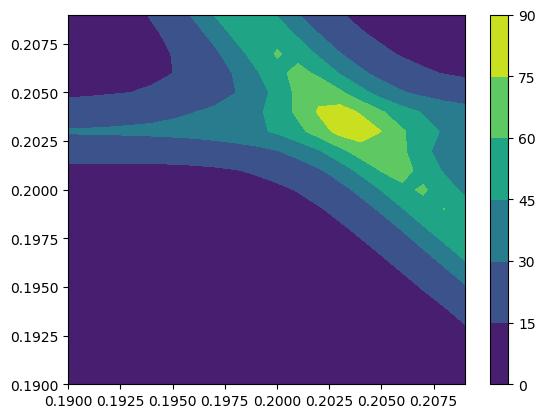

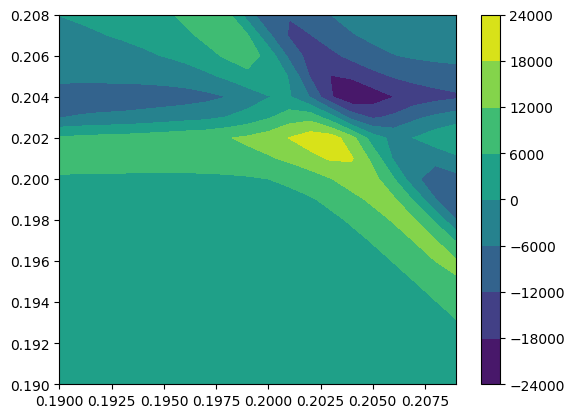

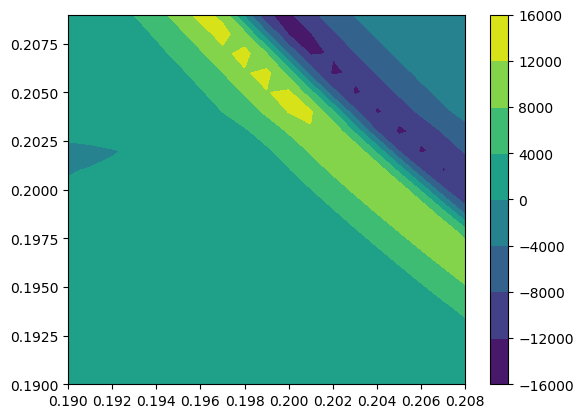

PyObject <matplotlib.colorbar.Colorbar object at 0x142302b70>

In [13]:
#spheroid 
 #1 r1
 #2 r2
 #3 Rho_s
 #4 Dfdr1_t (Theoretical gradients using SIE) 
 #5 Dfdr2_t (Theoretical gradients using SIE) 
data=[0.19 0.19 1.04461 97.8723 48.9616
0.19 0.191 1.09308 102.795 54.7904
0.19 0.192 1.15251 109.312 61.9843
0.19 0.193 1.2182 116.866 70.2126
0.19 0.194 1.29141 125.814 79.5676
0.19 0.195 1.37549 136.712 90.5656
0.19 0.196 1.4739 150.192 103.859
0.19 0.197 1.58667 166.487 119.691
0.19 0.198 1.71628 186.29 138.608
0.19 0.199 1.86308 210.022 160.92
0.19 0.2 2.03987 240.396 188.776
0.19 0.201 2.24287 277.365 222.419
0.19 0.202 2.4906 325.409 265.37
0.19 0.203 2.78064 385.408 318.282
0.19 0.204 3.12546 461.573 384.807
0.19 0.205 3.55116 562.282 471.388
0.19 0.206 4.08375 697.671 586.68
0.19 0.207 4.73824 876.913 737.293
0.19 0.208 5.52982 1110.77 931.575
0.19 0.209 6.65697 1471.29 1228.65
0.191 0.19 1.14961 116.406 53.994
0.191 0.191 1.20749 122.618 61.1172
0.191 0.192 1.27258 129.696 69.6638
0.191 0.193 1.34342 138.166 78.8827
0.191 0.194 1.42916 148.963 90.4551
0.191 0.195 1.5284 162.247 104.249
0.191 0.196 1.63983 178.068 120.266
0.191 0.197 1.77042 197.796 139.625
0.191 0.198 1.91826 221.347 162.636
0.191 0.199 2.09657 251.708 191.216
0.191 0.2 2.30136 288.569 225.99
0.191 0.201 2.5528 336.979 270.326
0.191 0.202 2.84557 397.05 325.106
0.191 0.203 3.2075 476.559 396.349
0.191 0.204 3.63214 576.602 484.636
0.191 0.205 4.18158 715.694 606.198
0.191 0.206 4.87129 904.271 769.059
0.191 0.207 5.75569 1166.15 992.636
0.191 0.208 6.89701 1532.92 1301.84
0.191 0.209 8.35861 2042.79 1726.8
0.192 0.19 1.27593 140.933 59.6407
0.192 0.191 1.3407 147.86 68.1896
0.192 0.192 1.41626 156.641 78.279
0.192 0.193 1.49761 166.391 89.7374
0.192 0.194 1.59379 179.028 103.316
0.192 0.195 1.70525 194.408 119.802
0.192 0.196 1.83161 213.003 139.076
0.192 0.197 1.9828 236.767 162.916
0.192 0.198 2.16081 266.517 192.24
0.192 0.199 2.37574 304.822 229.307
0.192 0.2 2.61971 351.189 273.537
0.192 0.201 2.92275 412.862 331.053
0.192 0.202 3.28832 492.558 404.58
0.192 0.203 3.73683 597.609 500.101
0.192 0.204 4.30063 739.927 627.75
0.192 0.205 4.998 930.128 796.092
0.192 0.206 5.93512 1207.28 1038.99
0.192 0.207 7.14895 1597.99 1376.94
0.192 0.208 8.65563 2124.88 1826.86
0.192 0.209 10.831 2950.09 2524.48
0.193 0.19 1.43467 175.002 66.2886
0.193 0.191 1.50501 182.467 76.2428
0.193 0.192 1.58559 191.816 87.7896
0.193 0.193 1.6833 204.069 102.129
0.193 0.194 1.79163 218.535 118.58
0.193 0.195 1.91767 236.472 138.424
0.193 0.196 2.07409 260.684 163.55
0.193 0.197 2.24409 288.376 192.457
0.193 0.198 2.45193 324.791 229.005
0.193 0.199 2.69593 370.475 273.933
0.193 0.2 3.00463 432.54 333.454
0.193 0.201 3.38561 514.749 411.512
0.193 0.202 3.8424 620.891 510.857
0.193 0.203 4.4163 764.807 643.835
0.193 0.204 5.14508 962.731 823.87
0.193 0.205 6.07639 1237.21 1070.15
0.193 0.206 7.31487 1634.22 1422.29
0.193 0.207 8.97097 2212.71 1929.7
0.193 0.208 11.2868 3092.81 2692.27
0.193 0.209 14.5398 4427.88 3834.97
0.194 0.19 1.63205 223.023 73.3026
0.194 0.191 1.7109 231.225 85.3031
0.194 0.192 1.80124 241.537 99.3296
0.194 0.193 1.90755 255.172 115.864
0.194 0.194 2.03855 273.72 136.494
0.194 0.195 2.18356 294.63 161.266
0.194 0.196 2.35697 322.149 191.398
0.194 0.197 2.57 358.921 229.48
0.194 0.198 2.81733 404.707 275.704
0.194 0.199 3.12284 464.961 336.506
0.194 0.2 3.50714 546.987 416.742
0.194 0.201 3.97694 655.316 520.647
0.194 0.202 4.53734 794.488 653.488
0.194 0.203 5.28558 996.132 841.786
0.194 0.204 6.27048 1284.98 1108.14
0.194 0.205 7.5311 1688.04 1475.18
0.194 0.206 9.28358 2299.25 2025.19
0.194 0.207 11.6953 3215.55 2838.74
0.194 0.208 15.0098 4573.05 4028.99
0.194 0.209 19.8428 6652.36 5828.3
0.195 0.19 1.88517 293.543 80.5054
0.195 0.191 1.9734 302.202 95.0992
0.195 0.192 2.07795 314.799 111.92
0.195 0.193 2.19322 328.481 132.107
0.195 0.194 2.34762 351.127 157.942
0.195 0.195 2.52014 377.409 188.844
0.195 0.196 2.72773 412.167 226.958
0.195 0.197 2.96936 455.08 274.064
0.195 0.198 3.27236 513.878 335.197
0.195 0.199 3.63912 590.144 414.043
0.195 0.2 4.10771 696.367 519.519
0.195 0.201 4.70771 843.641 664.009
0.195 0.202 5.47661 1049.42 861.038
0.195 0.203 6.45059 1333 1130.15
0.195 0.204 7.73161 1739.65 1510.96
0.195 0.205 9.50183 2353.23 2076.72
0.195 0.206 12.0068 3299.96 2939.63
0.195 0.207 15.6885 4803.44 4292.57
0.195 0.208 20.757 6971.11 6213.2
0.195 0.209 28.312 10091.5 8935.31
0.196 0.19 2.22572 401.683 88.6702
0.196 0.191 2.32074 411.099 105.186
0.196 0.192 2.43924 424.268 126.349
0.196 0.193 2.58072 442.584 151.776
0.196 0.194 2.74697 466.62 182.32
0.196 0.195 2.94757 498.158 220.672
0.196 0.196 3.20404 542.962 271.149
0.196 0.197 3.47955 592.581 330.458
0.196 0.198 3.87153 673.83 414.687
0.196 0.199 4.32518 774.58 519.383
0.196 0.2 4.92623 919.642 667.302
0.196 0.201 5.67394 1116.2 864.304
0.196 0.202 6.67655 1405.38 1144.75
0.196 0.203 8.01053 1825.37 1549.4
0.196 0.204 9.81637 2447.74 2139.75
0.196 0.205 12.4172 3426.54 3053.41
0.196 0.206 16.1166 4929.29 4440.6
0.196 0.207 21.3938 7168.16 6473.58
0.196 0.208 29.4914 10443.4 9402.13
0.196 0.209 40.2002 13459.5 12011.2
0.197 0.19 2.71486 586.458 94.9719
0.197 0.191 2.82177 594.892 115.908
0.197 0.192 2.95076 607.018 141.756
0.197 0.193 3.11378 627.477 173.686
0.197 0.194 3.29908 652.595 211.766
0.197 0.195 3.533 688.823 261.095
0.197 0.196 3.82001 739.946 322.638
0.197 0.197 4.1974 813.474 408.036
0.197 0.198 4.65722 912.382 517.351
0.197 0.199 5.20955 1040.7 658.27
0.197 0.2 5.97871 1241.02 861.322
0.197 0.201 7.0104 1533.21 1158.27
0.197 0.202 8.34257 1948.72 1568.72
0.197 0.203 10.1434 2563.53 2167.23
0.197 0.204 12.8143 3560.03 3125.55
0.197 0.205 16.5723 5075.53 4558.18
0.197 0.206 22.1253 7410.75 6735.28
0.197 0.207 30.42 10705.1 9751.69
0.197 0.208 41.3792 13590.1 12301.5
0.197 0.209 53.4952 11514.6 10224.7
0.198 0.19 3.45593 920.078 98.0117
0.198 0.191 3.56346 921.505 123.724
0.198 0.192 3.70602 930.308 156.408
0.198 0.193 3.88096 949.147 194.842
0.198 0.194 4.08607 969.076 244.982
0.198 0.195 4.36083 1014.38 305.981
0.198 0.196 4.71302 1075.75 390.247
0.198 0.197 5.17581 1172.14 502.014
0.198 0.198 5.7679 1308.96 652.947
0.198 0.199 6.46122 1476.5 849.746
0.198 0.2 7.46736 1754.39 1145.45
0.198 0.201 8.83933 2176.57 1574.31
0.198 0.202 10.6576 2788.1 2193.2
0.198 0.203 13.3087 3766.74 3162.24
0.198 0.204 17.1228 5290.73 4642.44
0.198 0.205 22.8082 7658.66 6909.21
0.198 0.206 31.1294 10919.7 9971.04
0.198 0.207 42.9496 13812.6 12587.6
0.198 0.208 54.6783 11120.5 9888.17
0.198 0.209 59.5263 -566.136 -1058.23
0.199 0.19 4.64534 1569.24 90.4743
0.199 0.191 4.75529 1557 123.991
0.199 0.192 4.90678 1560.28 163.32
0.199 0.193 5.09588 1566.79 214.617
0.199 0.194 5.34227 1590.26 278.664
0.199 0.195 5.66506 1634.57 362.386
0.199 0.196 6.09624 1716.65 471.225
0.199 0.197 6.64508 1827.5 621.859
0.199 0.198 7.34345 1985.73 825.805
0.199 0.199 8.2924 2228.95 1120.39
0.199 0.2 9.61873 2626.73 1543.56
0.199 0.201 11.4903 3244.44 2191.69
0.199 0.202 14.0448 4170.01 3145.84
0.199 0.203 17.9798 5722.67 4701.56
0.199 0.204 23.7417 8097.91 7038.66
0.199 0.205 32.2347 11376.9 10204.5
0.199 0.206 44.0606 14161 12788.8
0.199 0.207 56.1372 10879.9 9469.25
0.199 0.208 60.1709 -1158.59 -2046.91
0.199 0.209 52.7942 -11241.4 -11422.7
0.2 0.19 6.88658 3069.44 50.8112
0.2 0.191 6.93865 2991.96 96.2165
0.2 0.192 7.01981 2918.4 150.256
0.2 0.193 7.26002 2933.68 216.043
0.2 0.194 7.46653 2893.36 301.909
0.2 0.195 7.87812 2953.25 416.007
0.2 0.196 8.35148 3022.52 559.651
0.2 0.197 8.98615 3128.42 766.103
0.2 0.198 9.91652 3351.36 1062.06
0.2 0.199 11.159 3685.99 1487.46
0.2 0.2 13.0104 4282.48 2138.79
0.2 0.201 15.5423 5175.29 3106.12
0.2 0.202 19.3881 6650.66 4676.35
0.2 0.203 25.1261 8985.4 7049.35
0.2 0.204 33.8094 12290.8 10354.8
0.2 0.205 45.5956 14999.2 12952.4
0.2 0.206 57.5414 11733.5 9601.76
0.2 0.207 61.4882 -840.046 -2711.34
0.2 0.208 53.3828 -10565.7 -11924.2
0.2 0.209 40.8002 -10966.4 -12120.5
0.201 0.19 11.3959 6609.33 -63.8064
0.201 0.191 11.4333 6497.31 -5.3952
0.201 0.192 11.4707 6354.79 67.1653
0.201 0.193 11.6038 6245.06 159.783
0.201 0.194 11.8425 6175.89 275.931
0.201 0.195 12.0972 6044.02 436.783
0.201 0.196 12.6539 6092.96 641.207
0.201 0.197 13.3951 6170.93 934.926
0.201 0.198 14.6081 6466.01 1369.19
0.201 0.199 16.2824 6939.77 2006.75
0.201 0.2 18.6427 7698.09 2965.93
0.201 0.201 22.4987 9142.02 4569.48
0.201 0.202 28.2769 11423.8 7043.11
0.201 0.203 36.794 14602.6 10377.2
0.201 0.204 48.9014 17345.5 13082.7
0.201 0.205 60.9407 13727.3 9365.01
0.201 0.206 64.3339 1066.15 -3206.64
0.201 0.207 55.7162 -8411.8 -12337.8
0.201 0.208 42.9826 -8507.96 -12214
0.201 0.209 32.4754 -5417.22 -8966.91
0.202 0.19 21.401 13123.3 -283.428
0.202 0.191 21.1661 13013.8 -204.918
0.202 0.192 20.9448 12869.4 -106.563
0.202 0.193 20.9237 12774.8 12.097
0.202 0.194 21.0015 12682.6 170.629
0.202 0.195 21.2855 12644.2 384.583
0.202 0.196 21.6337 12570.3 683.149
0.202 0.197 22.6626 12797.5 1117.41
0.202 0.198 24.1141 13165.6 1766.22
0.202 0.199 26.0923 13744.1 2688.51
0.202 0.2 29.5055 14932 4260.63
0.202 0.201 35.2322 17212.4 6737.62
0.202 0.202 43.7657 20397.1 10202.1
0.202 0.203 55.5479 23030.9 13074.2
0.202 0.204 67.5504 19661.9 9641.58
0.202 0.205 71.142 6755.87 -3407.83
0.202 0.206 62.5418 -2644.84 -12621.5
0.202 0.207 49.0773 -2881.48 -12434.2
0.202 0.208 38.5326 371.954 -9036.25
0.202 0.209 30.9409 3017 -6094.53
0.203 0.19 31.2222 306.691 278.798
0.203 0.191 31.504 1745.48 301.315
0.203 0.192 31.8382 2894.95 363.895
0.203 0.193 32.2881 3552.27 477.569
0.203 0.194 32.82 4819.13 629.515
0.203 0.195 33.5504 6153.14 871.53
0.203 0.196 34.5543 7485.98 1238.17
0.203 0.197 36.2058 8200.03 1831.15
0.203 0.198 38.4928 10031.3 2780.04
0.203 0.199 41.9049 12213.4 4270.82
0.203 0.2 47.2973 14940.5 6650.63
0.203 0.201 55.4425 19092.5 10083.6
0.203 0.202 67.1787 22526.5 13172.4
0.203 0.203 80.3196 19663.1 9845.99
0.203 0.204 83.9296 8211.95 -2953.38
0.203 0.205 74.8997 -990.728 -12886.3
0.203 0.206 61.7334 -755.975 -12632.8
0.203 0.207 50.7758 3180.84 -9235.58
0.203 0.208 43.2103 6241.04 -6122.94
0.203 0.209 38.2412 8376.94 -4142.32
0.204 0.19 21.8604 -12649.5 819.325
0.204 0.191 22.5176 -12670.8 903.81
0.204 0.192 23.6741 -12746.5 1024.92
0.204 0.193 24.7803 -12694.1 1194.37
0.204 0.194 26.0099 -12543.3 1434.78
0.204 0.195 27.8593 -12259.8 1801.41
0.204 0.196 29.7044 -11763.1 2373.08
0.204 0.197 32.4572 -10937 3288.64
0.204 0.198 36.4416 -9591.84 4710.41
0.204 0.199 42.1547 -7420.28 7009.81
0.204 0.2 50.6338 -4200.97 10401.9
0.204 0.201 63.1027 -862.637 13874.3
0.204 0.202 76.7396 -2739.45 11338.4
0.204 0.203 82.2625 -14475.4 -1598.63
0.204 0.204 73.3589 -24928 -12508.8
0.204 0.205 61.3807 -24453.1 -12343.7
0.204 0.206 50.5487 -20873.4 -8698.09
0.204 0.207 43.7583 -17585.1 -5711.41
0.204 0.208 38.606 -15777.1 -3637.23
0.204 0.209 35.6884 -14230.4 -2399.77
0.205 0.19 12.3924 -6138.35 654.574
0.205 0.191 13.118 -6247.76 777.077
0.205 0.192 13.9903 -6319.3 947.768
0.205 0.193 15.0086 -6261.82 1193.93
0.205 0.194 16.3876 -6137.16 1563.84
0.205 0.195 18.1524 -5867.52 2100.45
0.205 0.196 20.7721 -5403.64 2968.07
0.205 0.197 24.301 -4333.5 4350.72
0.205 0.198 29.7508 -2494.24 6632.04
0.205 0.199 37.8264 382.247 9998.11
0.205 0.2 49.6878 3553.89 13638.8
0.205 0.201 63.5743 2149.65 12076.4
0.205 0.202 69.971 -9815.37 -942.665
0.205 0.203 62.6599 -20497.8 -12227.3
0.205 0.204 49.7994 -21427.1 -12771.3
0.205 0.205 38.2287 -17980.3 -9003.1
0.205 0.206 31.0671 -15274.1 -5864.23
0.205 0.207 26.3592 -13488.1 -3770.44
0.205 0.208 23.2538 -12375.3 -2484.9
0.205 0.209 21.1941 -11724.2 -1683.96
0.206 0.19 8.35363 -2495.4 627.856
0.206 0.191 9.0062 -2437.44 779.992
0.206 0.192 9.93272 -2321.17 1019.6
0.206 0.193 11.0858 -2119.88 1353.44
0.206 0.194 12.7275 -1771.05 1880.82
0.206 0.195 14.9304 -1167.17 2678.41
0.206 0.196 18.2158 -141.229 3982.74
0.206 0.197 23.4253 1804.93 6258.84
0.206 0.198 31.157 4617.55 9577.76
0.206 0.199 42.9004 8105.01 13493
0.206 0.2 56.2687 7606.35 12862.9
0.206 0.201 63.9248 -3181.64 678.537
0.206 0.202 57.3786 -14920.1 -12096.5
0.206 0.203 43.9058 -16066.3 -13166.9
0.206 0.204 32.7344 -12952.2 -9520.12
0.206 0.205 24.8081 -9878.73 -6142.75
0.206 0.206 19.7427 -7893.45 -3937.23
0.206 0.207 16.6786 -6803.21 -2643.74
0.206 0.208 14.4836 -6065.47 -1811.59
0.206 0.209 12.9913 -5639.65 -1275.29
0.207 0.19 6.73941 -961.587 703.535
0.207 0.191 7.53319 -815.631 920.063
0.207 0.192 8.60281 -591.023 1239.49
0.207 0.193 10.042 -220.053 1720.78
0.207 0.194 12.1665 397.722 2503.59
0.207 0.195 15.2778 1432.88 3770.08
0.207 0.196 19.9191 3120.73 5799.42
0.207 0.197 27.0489 5800.8 8962.53
0.207 0.198 38.1058 9335.3 13034.9
0.207 0.199 51.9826 9963.33 13623.1
0.207 0.2 61.1297 394.022 2509.5
0.207 0.201 55.9032 -12028.3 -11491.9
0.207 0.202 42.3117 -14090.7 -13592.9
0.207 0.203 30.4887 -10924.2 -9920.2
0.207 0.204 22.3805 -7836.48 -6414.36
0.207 0.205 17.1227 -5762.21 -4113.19
0.207 0.206 13.8741 -4560.08 -2757.49
0.207 0.207 11.5288 -3755.9 -1865.23
0.207 0.208 9.98604 -3269.74 -1332.46
0.207 0.209 8.85605 -2951.7 -969.807
0.208 0.19 6.17691 -201.349 842.124
0.208 0.191 7.14275 22.0422 1136.32
0.208 0.192 8.50895 360.721 1586.94
0.208 0.193 10.4574 939.37 2310.33
0.208 0.194 13.351 1886.98 3486.36
0.208 0.195 17.3358 3314.96 5229.9
0.208 0.196 24.2902 5936.01 8383.31
0.208 0.197 34.4915 9402.91 12457.9
0.208 0.198 48.6165 11055.2 14263.9
0.208 0.199 59.3807 2866.65 4498.59
0.208 0.2 55.8387 -10146.5 -10565.5
0.208 0.201 42.4543 -13316 -14012.3
0.208 0.202 30.1763 -10346.2 -10475.9
0.208 0.203 21.7813 -7206.84 -6860.65
0.208 0.204 16.0537 -4956.89 -4319.54
0.208 0.205 12.7243 -3718.91 -2906.64
0.208 0.206 10.1957 -2839.35 -1940.85
0.208 0.207 8.58211 -2331.33 -1372.07
0.208 0.208 7.4112 -1992.18 -997.47
0.208 0.209 6.55435 -1766.58 -744.6
0.209 0.19 6.22285 281.787 1055.25
0.209 0.191 7.51005 598.082 1478.45
0.209 0.192 9.28196 1105.46 2128.84
0.209 0.193 11.8182 1917.96 3152.39
0.209 0.194 15.8916 3346.81 4938.01
0.209 0.195 22.0453 5645.69 7763.69
0.209 0.196 31.8749 9110.46 11931.5
0.209 0.197 45.5294 11490.3 14667.4
0.209 0.198 57.5688 5499.41 7298.8
0.209 0.199 56.4752 -8272.24 -9061.99
0.209 0.2 43.7714 -12957.5 -14379.8
0.209 0.201 30.6503 -10266.9 -11099.8
0.209 0.202 21.6364 -6983.27 -7231.15
0.209 0.203 15.9059 -4749.63 -4639.77
0.209 0.204 12.0566 -3310.17 -2999.16
0.209 0.205 9.59023 -2459.11 -2029.14
0.209 0.206 7.90147 -1922.6 -1428.9
0.209 0.207 6.68432 -1568.4 -1033.52
0.209 0.208 5.79668 -1334.06 -766.167
0.209 0.209 5.10643 -1161.94 -580.728]
N = length(data[:,1])
N1 = 20
N2 = 20
r1 = zeros(N1,1)
r2 = zeros(N2,1)
R1 = zeros(N1,N2)
R2 = zeros(N1,N2)
rho_s = zeros(N1,N2)
dr1_s = zeros(N1-1,N2)
dr2_s = zeros(N1,N2-1)
dr1_t = zeros(N1-1,N2)
dr2_t = zeros(N1,N2-1)
for i=1:N
    i1 = Int(ceil(i/N1))
    i2 = mod(i,N2)
    i2 += (i2==0)*N2
    r1[i1] = data[i,1]
    r2[i2] = data[i,2]
    R1[i1,i2] = data[i,1]
    R2[i1,i2] = data[i,2]
    rho_s[i1,i2] = data[i,3]
end
for i1=1:N1-1
    for i2=1:N2
        i = (i1-1)*N1+i2
        iplus = (i1)*N1+i2
        dr1_t[i1,i2] = (data[i,4]+data[iplus,4])/2
        dr1_s[i1,i2] = (rho_s[i1+1,i2]-rho_s[i1,i2])/1e-3
    end
end

for i1=1:N1
    for i2=1:N2-1
        i = (i1-1)*N1+i2
        iplus = (i1-1)*N1+i2+1
        dr2_t[i1,i2] = (data[i,5]+data[iplus,5])/2
        dr2_s[i1,i2] = (rho_s[i1,i2+1]-rho_s[i1,i2])/1e-3
    end
end
using PyPlot
figure(1)
contourf(r2[:],r1[:],rho_s)
colorbar()
figure(2)
contourf(r2[:],r1[1:end-1],dr1_t)
colorbar()
figure(3)
contourf(r2[1:end-1],r1[:],dr2_t)
colorbar()

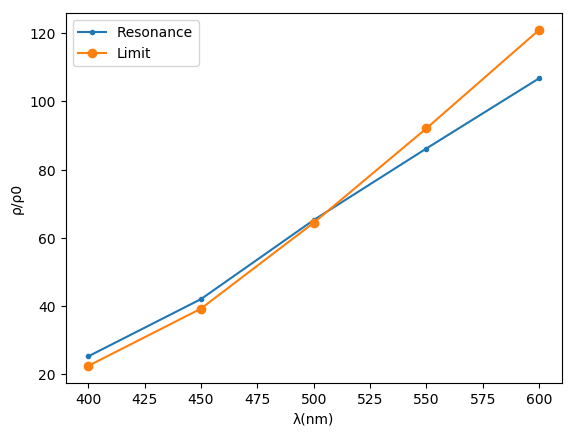

PyObject <matplotlib.legend.Legend object at 0x14c52ecc0>

In [25]:
λ = [400 450 500 550 600]
a = [128 155 180 203 226]
ρs = [25.2 42.0 65.2 86.2 106.8]
ρm = [22.4 39.2 64.4 92.1 121.0]
plot(λ[:],ρs[:],".-",label="Resonance")
plot(λ[:],ρm[:],"o-",label="Limit")
xlabel("λ(nm)")
ylabel("ρ/ρ0")
legend()

In [21]:
(106-120)/120

-0.11666666666666667

In [16]:
662.04/12

55.169999999999995

In [18]:
606.87/11/1.5

36.78